There were 38 peaks found.


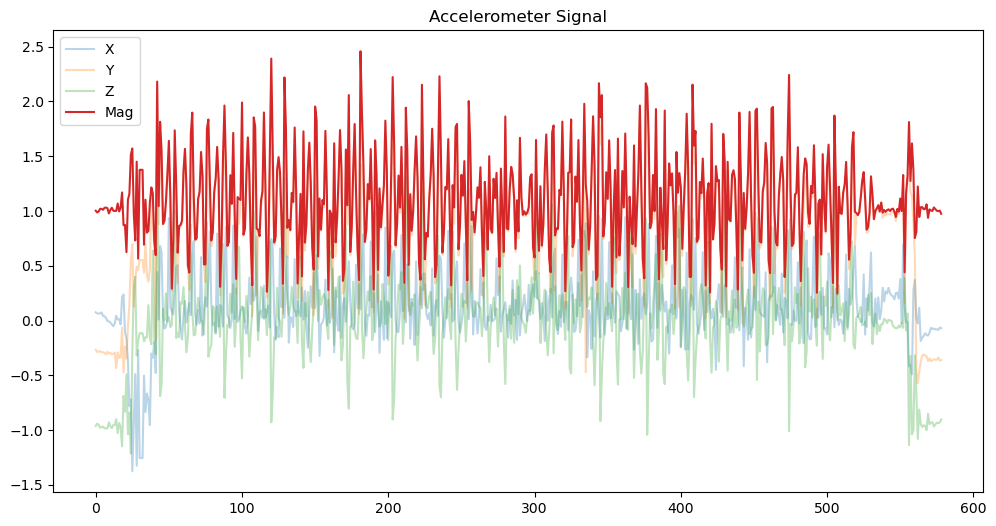

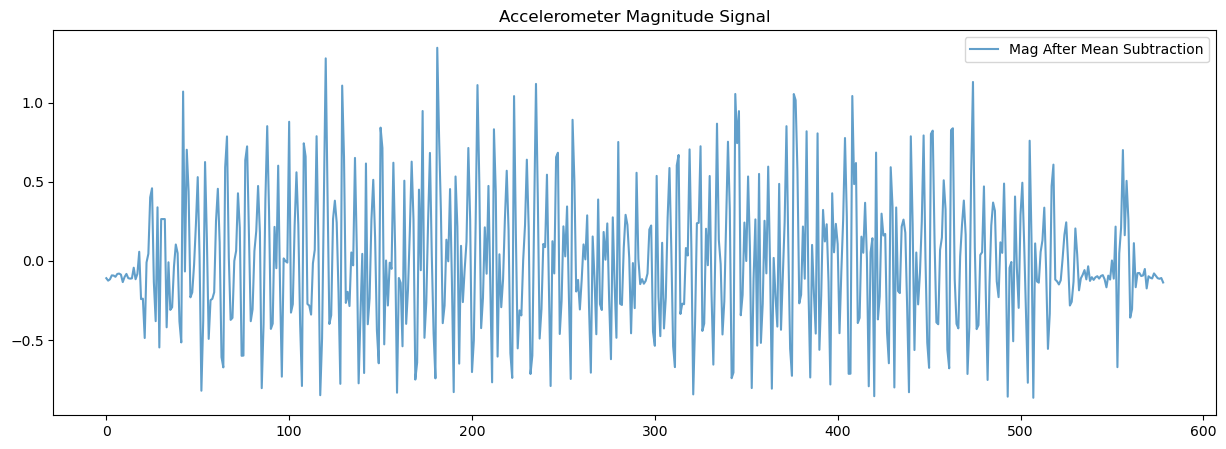

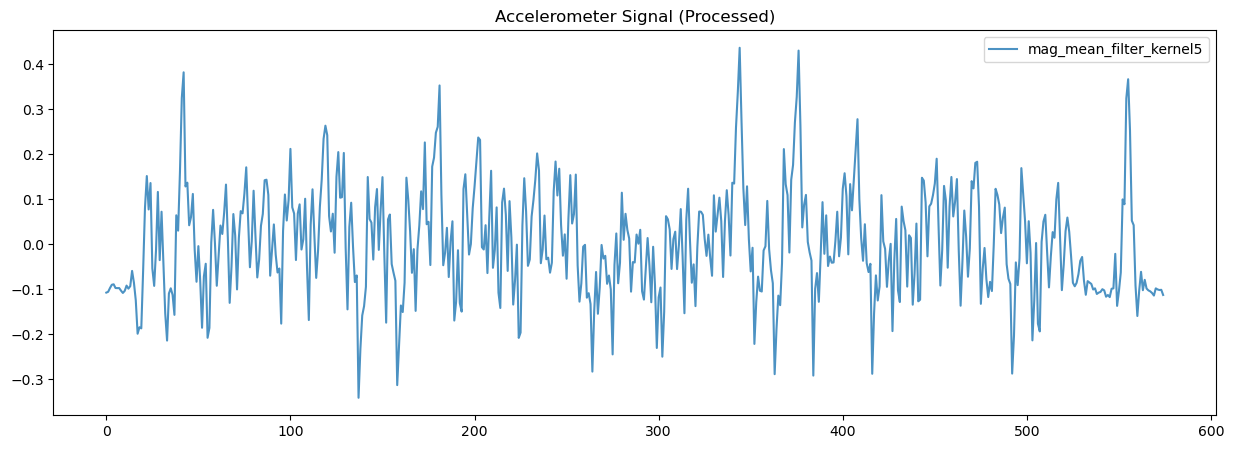

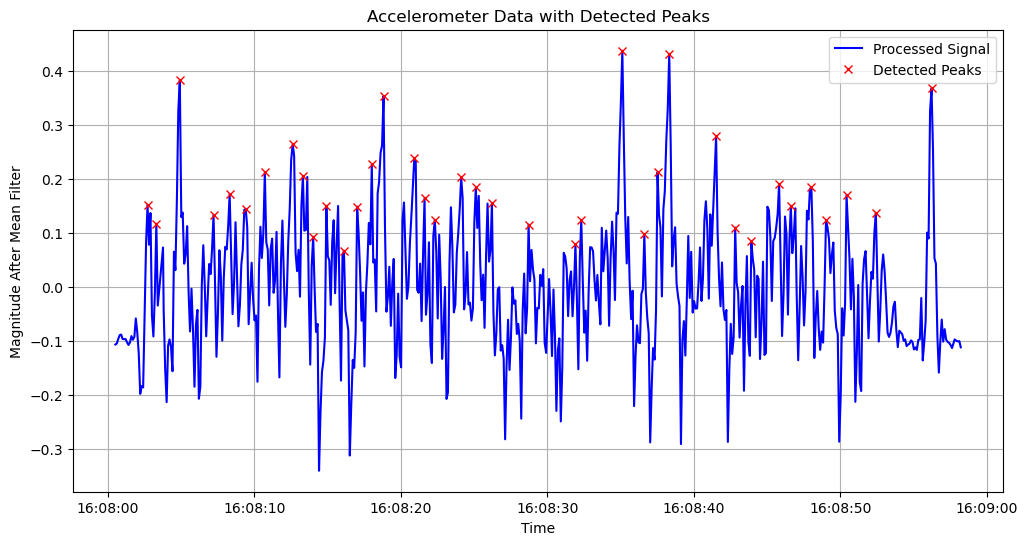

In [61]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy as sp
from scipy import signal
from scipy.signal import find_peaks
import os

# gathering data from csv file of accelerometer data
log_path = '/Users/nathan/Downloads/I3R Stat'
files_in_log_path = [f for f in os.listdir(log_path) if os.path.isfile(os.path.join(log_path, f))]

log_filename = 'accelerometer.csv'

log_filename_with_path = os.path.join(log_path, log_filename)

data = pd.read_csv(log_filename_with_path)


#-----------------------------------------------------------


# organizing data and calculating magnitude
timestamps = pd.to_datetime(data['Date'])
accel_x = data['X'].astype(float)
accel_y = data['Y'].astype(float)
accel_z = data['Z'].astype(float)
accel_mag = (accel_x**2 + accel_y**2 + accel_z**2)**0.5

# slicing the data to create a smaller subset that will create a zoomed-in graph
start_point = 50
end_point = 150

timestamps_subset = timestamps[start_point:end_point]
accel_x_subset = accel_x[start_point:end_point]
accel_y_subset = accel_y[start_point:end_point]
accel_z_subset = accel_z[start_point:end_point]
accel_mag_subset = accel_mag[start_point:end_point]


#-----------------------------------------------------------


# graphing the raw data from the csv file
df = pd.DataFrame(list(zip(timestamps, accel_x, accel_y, accel_z, accel_mag)), 
               columns =['Time', "X", "Y", "Z", "Mag"]) 

fig, axes = plt.subplots(1, figsize=(12, 6))
axes.plot(accel_x, alpha=0.3, label="X")
axes.plot(accel_y, alpha=0.3, label="Y")
axes.plot(accel_z, alpha=0.3, label="Z")
axes.plot(accel_mag, alpha=1, label="Mag")

# graphing the zoomed in version
"""
fig, axes = plt.subplots(1, figsize=(10, 5))
axes.plot(accel_x_subset, alpha=0.3, label="X")
axes.plot(accel_y_subset, alpha=0.3, label="Y")
axes.plot(accel_z_subset, alpha=0.3, label="Z")
axes.plot(accel_mag_subset, alpha=1, label="Mag")
"""

axes.set_title("Accelerometer Signal")
axes.legend()

#-----------------------------------------------------------




# cleaning up the data by mean subtraction, which brings the mean down to 0
mag_after_mean_subtraction = accel_mag - np.average(accel_mag)

fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

axes.plot(mag_after_mean_subtraction, alpha=0.7, label="Mag After Mean Subtraction")

axes.set_title("Accelerometer Magnitude Signal")
axes.legend()




#-----------------------------------------------------------



# cleaning the data by putting a mean filter
filter_window_size = 5

mag_mean_filter_kernel5 = np.convolve(mag_after_mean_subtraction, 
                           np.ones((filter_window_size,))/filter_window_size, 
                           mode='valid')

fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

# axes.plot(accel_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_mean_filter_kernel5, alpha=0.8, label="mag_mean_filter_kernel5")

# set the title and show the legend
axes.set_title("Accelerometer Signal (Processed)")
axes.legend()


#-----------------------------------------------------------



# finding the peaks of the data in order to track steps
peaks, properties = find_peaks(
    mag_mean_filter_kernel5, 
    height=0.05,       # Minimum height of peaks
    distance=1,      # Minimum distance between peaks (adjust for sampling rate)
    prominence=0.2    # Minimum prominence of peaks
)

num_peaks = len(peaks)
print(f"There were {num_peaks} peaks found.")

adjusted_timestamps = timestamps[:len(mag_mean_filter_kernel5)]


plt.figure(figsize=(15, 5))
plt.plot(adjusted_timestamps, mag_mean_filter_kernel5, label="Processed Signal", color="blue")
plt.plot(adjusted_timestamps[peaks], mag_mean_filter_kernel5[peaks], "x", label="Detected Peaks", color="red")
plt.title("Accelerometer Data with Detected Peaks")
plt.xlabel("Time")
plt.ylabel("Magnitude After Mean Filter")
plt.legend()
plt.grid(True)
plt.show()
         

